## Лосс на валидации для разных оптимизаторов с разными learning rate

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


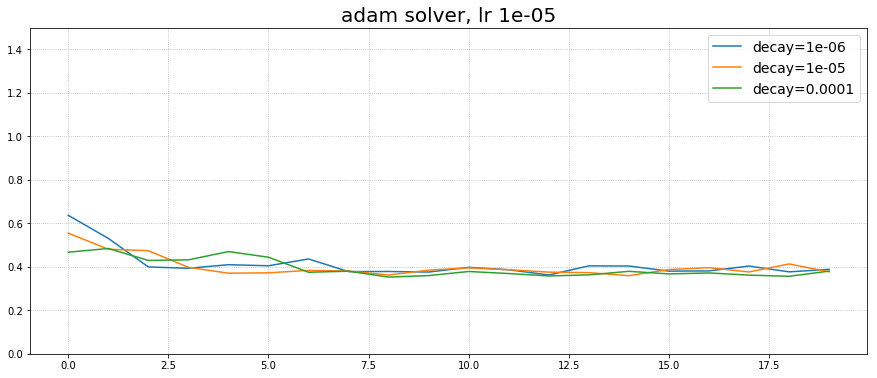

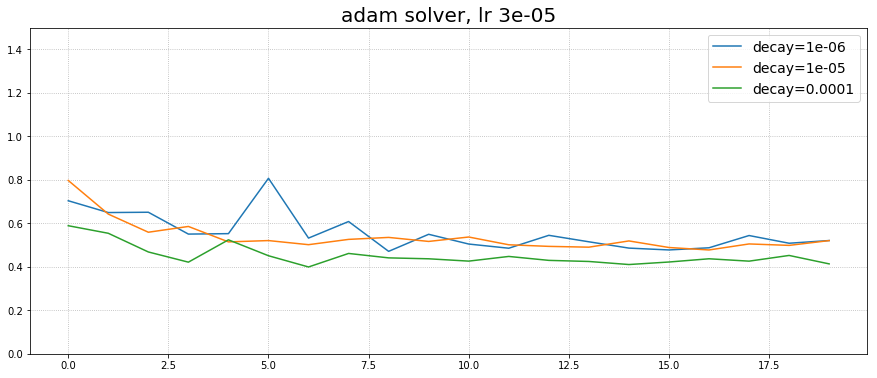

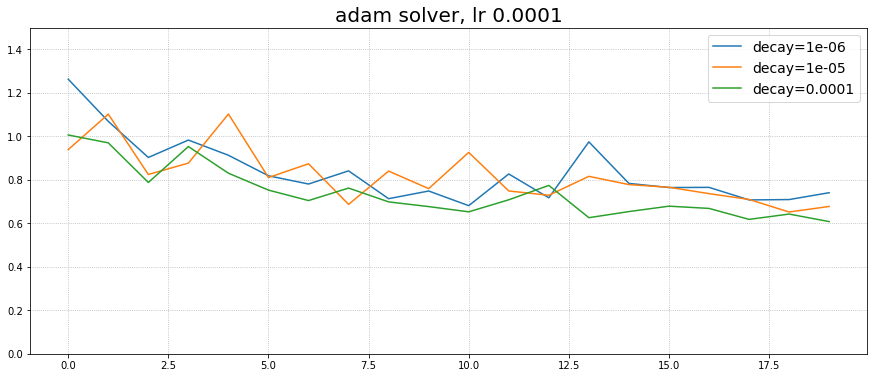

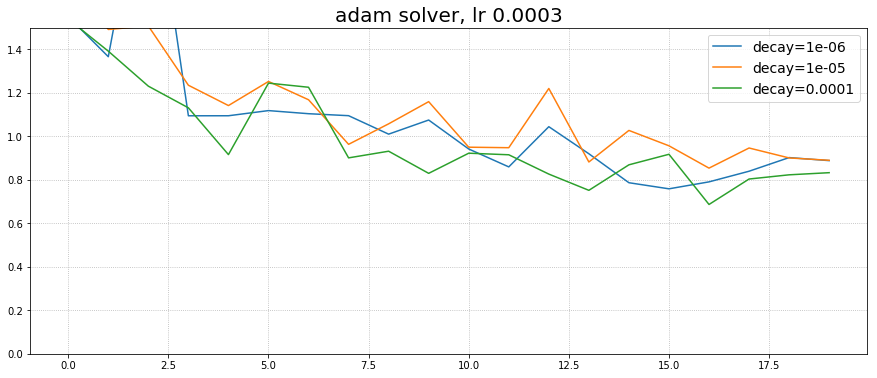

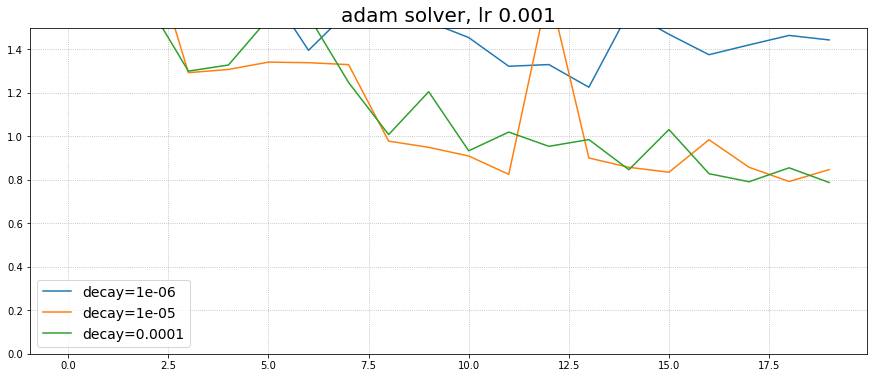

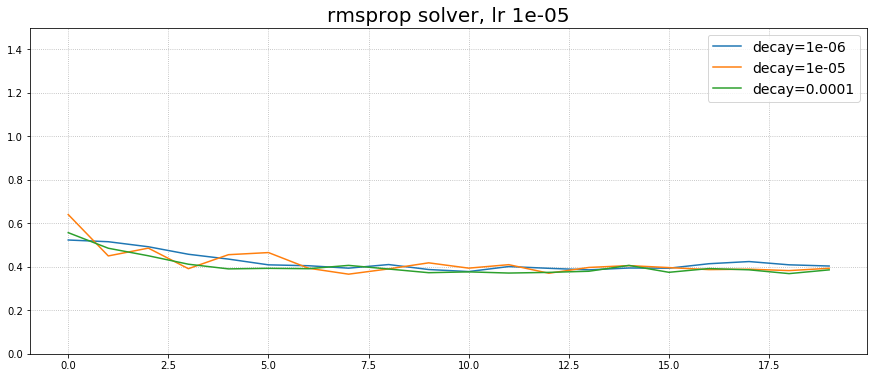

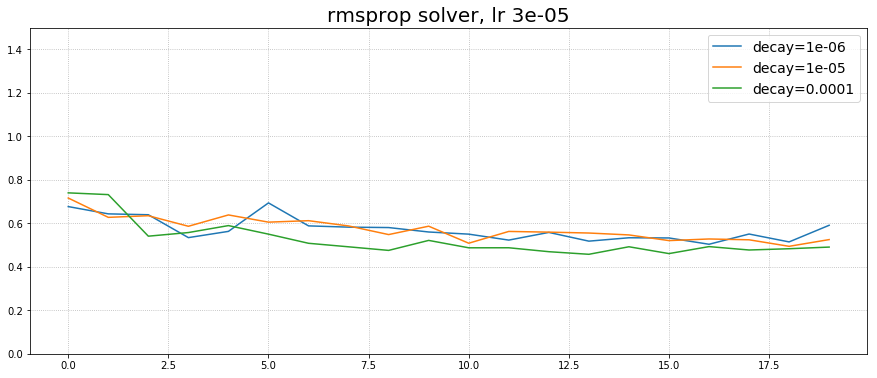

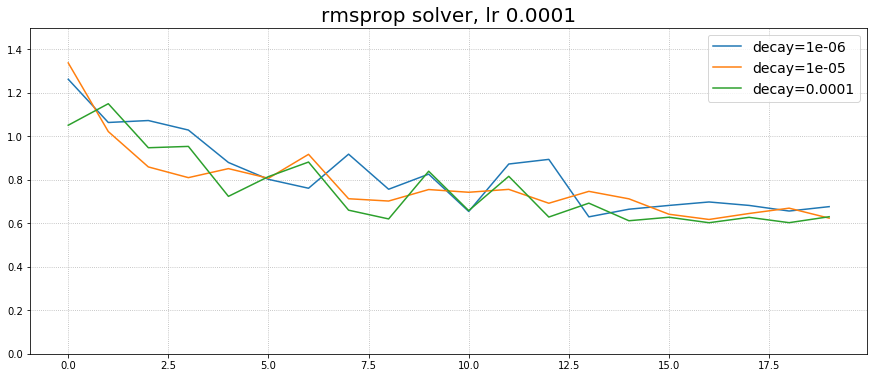

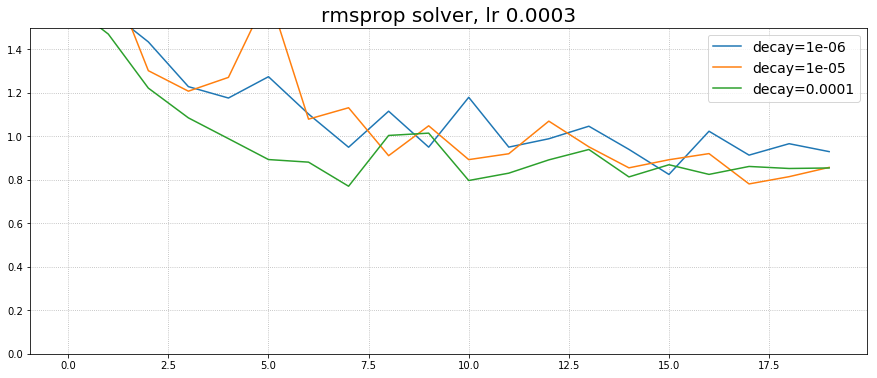

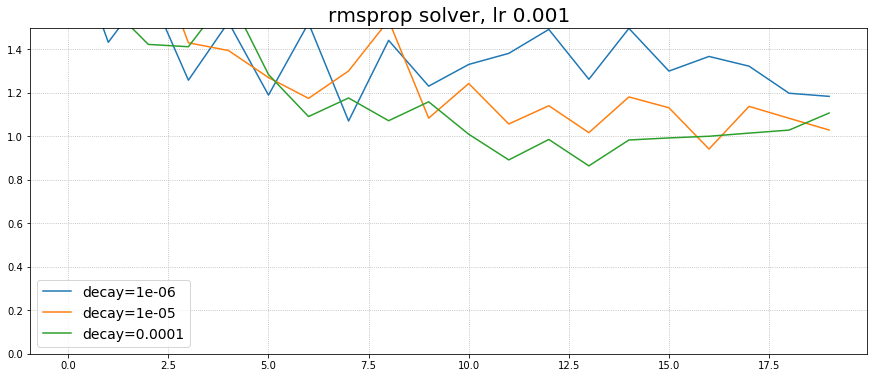

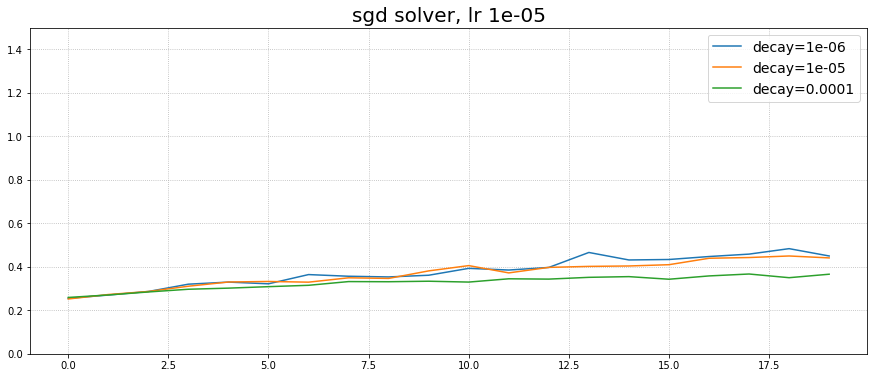

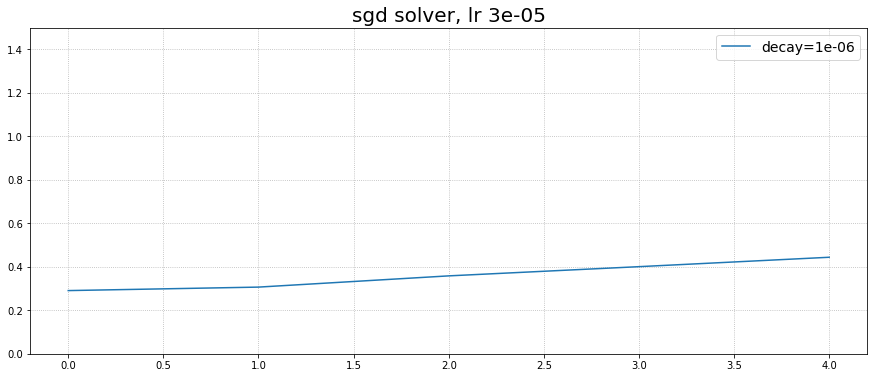

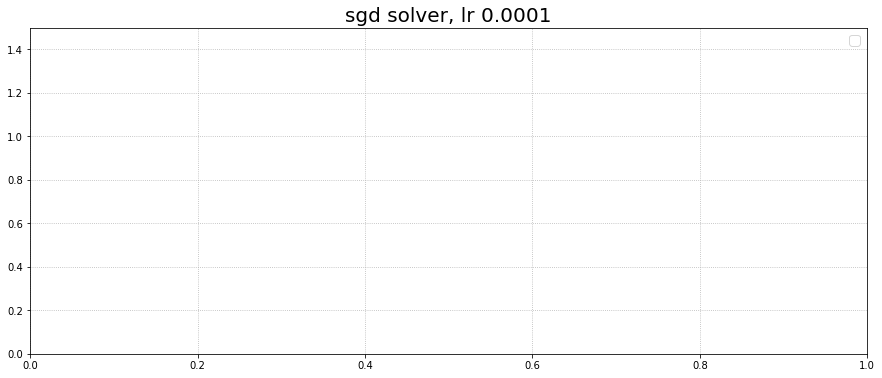

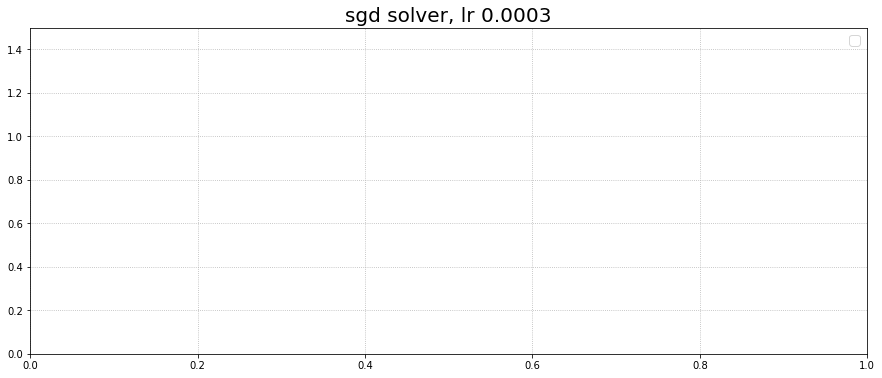

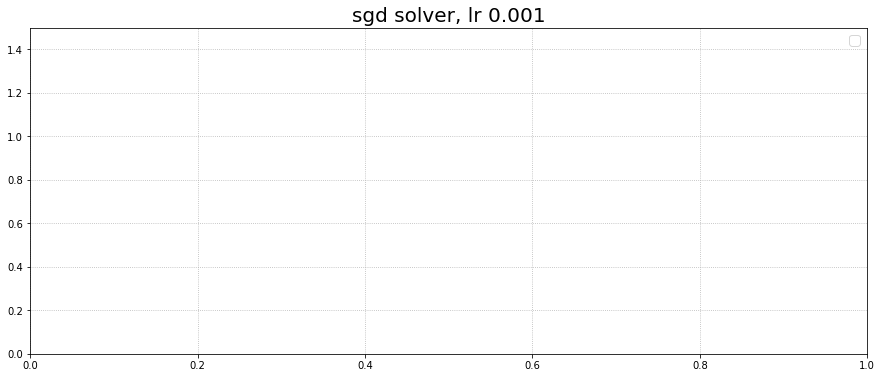

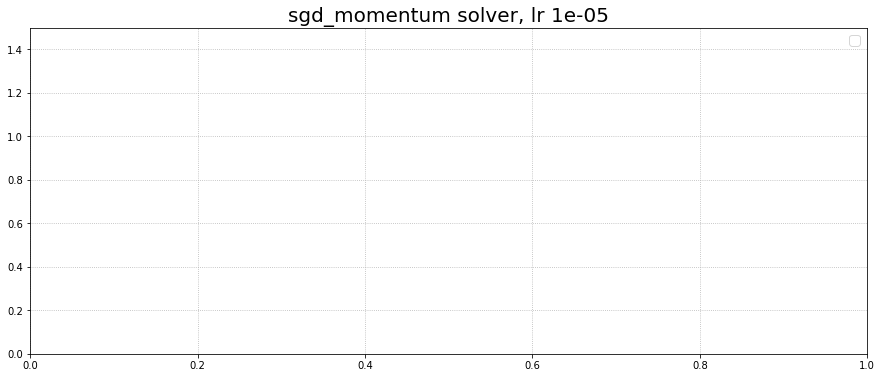

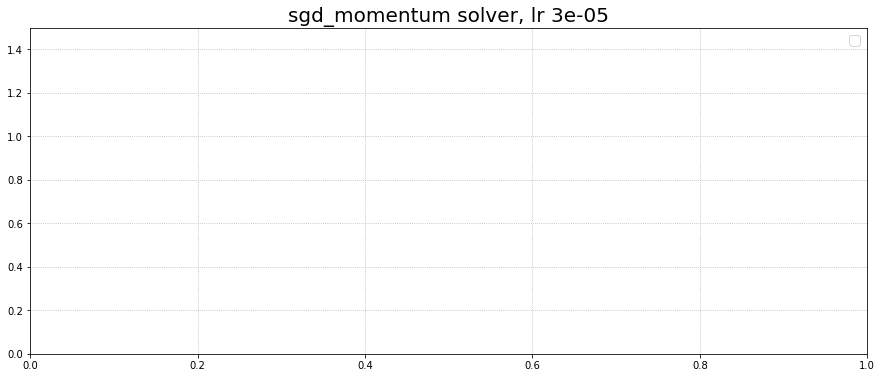

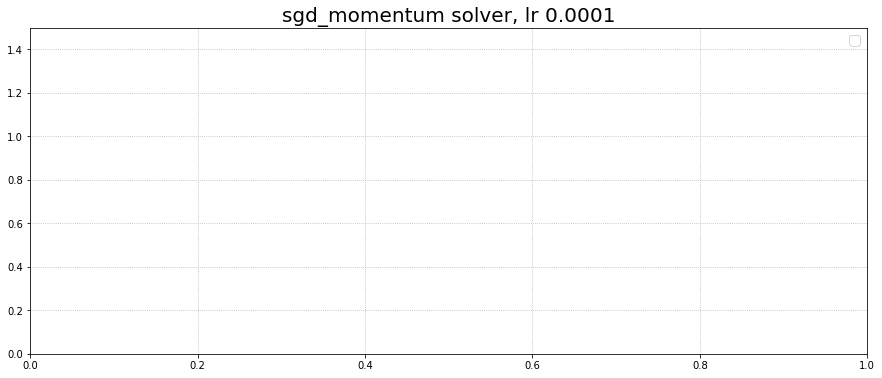

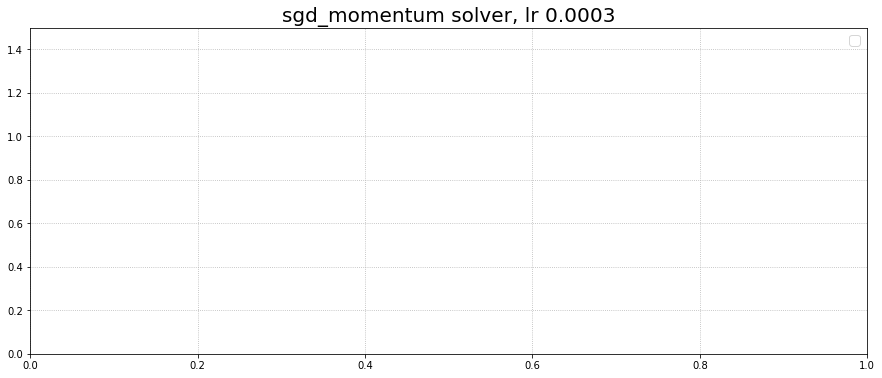

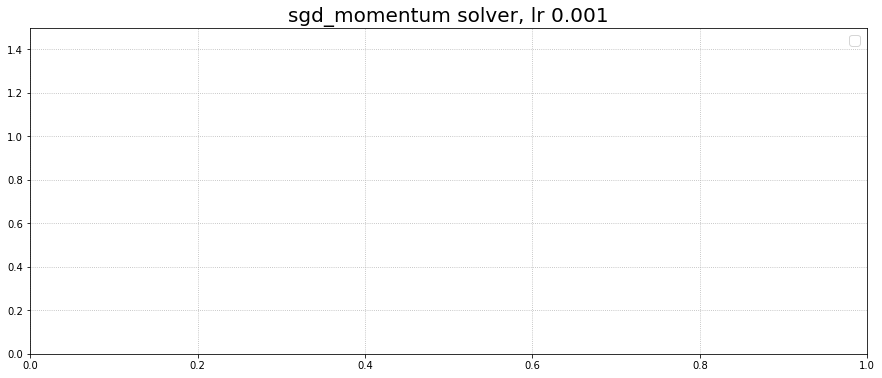

In [8]:
for solver_name in ['adam', 'rmsprop', 'sgd', 'sgd_momentum']:
    for lr in [1e-5, 3e-5, 1e-4, 3e-4, 1e-3]:
        plt.figure(figsize=(15, 6))
        plt.title('{} solver, lr {}'.format(solver_name, lr), fontsize=20)
        plt.grid(ls=':')
        plt.ylim((0, 1.5))
        for decay in [1e-6, 1e-5, 1e-4]:
            save_dir = '/home/kmouraviev/FCRN_notebooks/finetune_{}_lr{}_decay{}'.format(solver_name, lr, decay)
            try:
                val_loss = np.loadtxt(os.path.join(save_dir, 'val_losses.txt'))
            except:
                break
            plt.plot(val_loss, label='decay={}'.format(decay))
        plt.legend(fontsize=14)